<a href="https://colab.research.google.com/github/SabinSapota/SabinSapota/blob/main/world_hapiness_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

World hapiness data:
Here,I have analysed two dataset one is for 2021 and other one is old from 2006 to 2020.

Since,I am Nepali,so I have analysed data for Nepal only and its south asian neighbours.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#this is new data set for 2021
path='/content/world-happiness-report-2021.csv'
df=pd.read_csv(path)
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [ ]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [ ]:
df.dtypes

Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

In [ ]:
#columns with missing value
[col for col in df.columns if df[col].isnull().any()]

[]

In [ ]:
#checking na value
df.isna().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [ ]:
#shape begore dropping columns
df.shape

(149, 20)

In [ ]:
#droping few columns which are not useful for this analysis
df = df.drop(['Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Ladder score in Dystopia'], axis = 1)

In [ ]:
#after dropping columns
df.shape

(149, 10)

In [ ]:
df.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430329
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.537645
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,0.648000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.138000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.509000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.794000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,3.482000


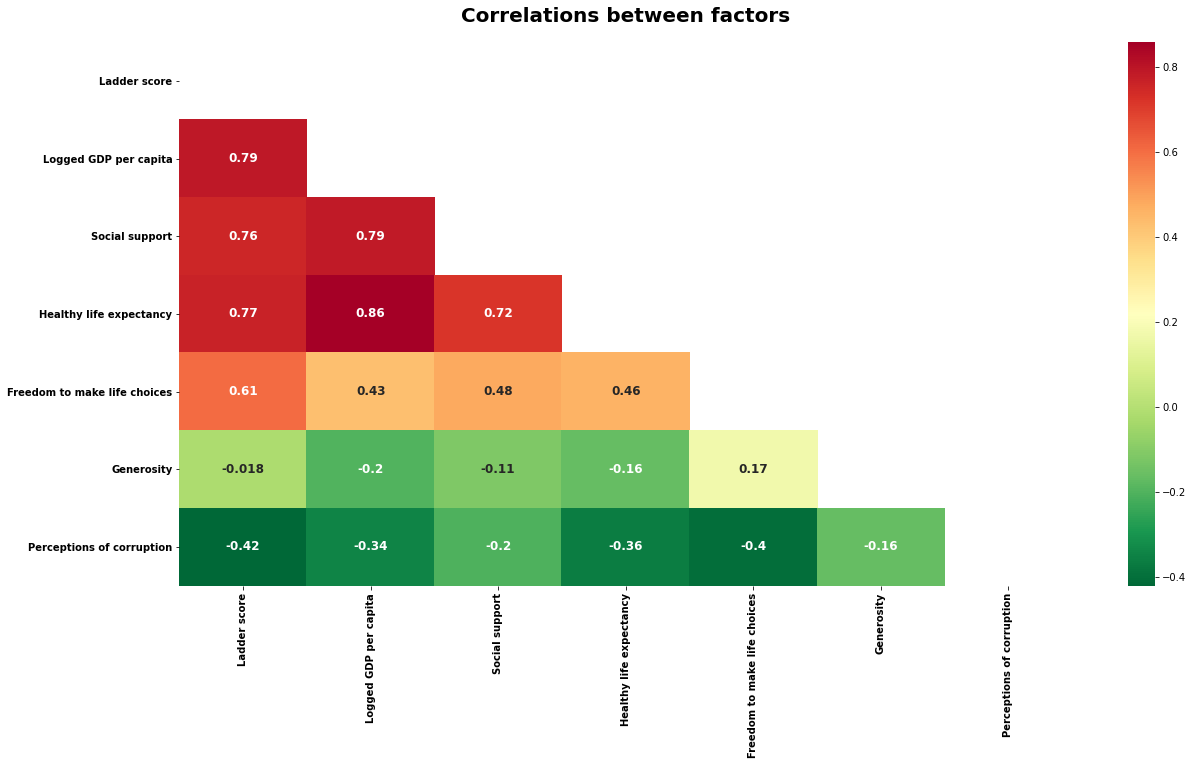

In [ ]:
#correlation
cols = df[['Ladder score', 'Logged GDP per capita','Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]
plt.figure(figsize=(20,10))
sns.heatmap(cols.corr(),annot=True,cmap='RdYlGn_r',mask=np.triu(np.ones_like(cols.corr())),annot_kws={"fontsize":12,'fontweight':'bold'})
plt.title('Correlations between factors', fontsize=20, fontweight='bold', pad=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold');


From above we can observe,


*   The high correlation between logged GDP per capita and ladder score

*   The high correlation between healthy life expectancy and social support



*   Weak correlation between ladder score and generosity








**Correlation between ladder score and generosity**

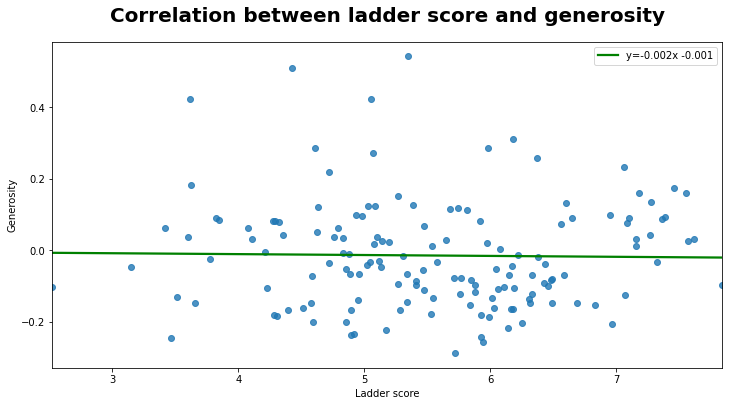

In [ ]:
from scipy import stats
plt.figure(figsize=(12, 6))
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Ladder score'],df['Generosity'])
sns.regplot(x='Ladder score', y='Generosity', data=df,ci=None,line_kws={'label':f'y={round(slope,3)}x {round(intercept,3)}','color':'green'});
plt.title('Correlation between ladder score and generosity', fontsize=20, fontweight='bold', pad=20)
plt.legend();

from this graph we can conclude that


*   Few outliers in low ladder scores and high generosity values and vice versa

*   Little to no correlation between ladder score and generosity of the countries



**Correlation between ladder score and perceptions of corruption**

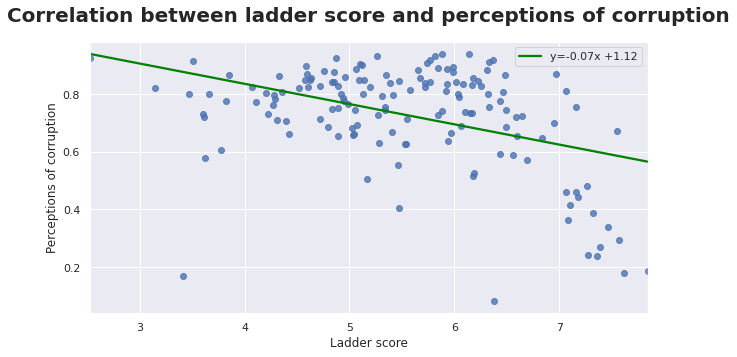

In [ ]:
#plt.figure(figsize=(12, 6))
sns.set(rc={"figure.figsize":(10, 5)})
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Ladder score'],df['Perceptions of corruption'])
sns.regplot(x='Ladder score', y='Perceptions of corruption', data=df, ci=None,line_kws={'label':f'y={round(slope,3)}x +{round(intercept,2)}','color':'green'});
plt.title('Correlation between ladder score and perceptions of corruption', fontsize=20, fontweight='bold', pad=20)
plt.legend();

Weak correlation between ladder score and perceptions of corruption

In [ ]:
#this is old data set from 2008 to 2020
path='/content/world-happiness-report.csv'
df_old=pd.read_csv(path)
df_old.head(2)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.37,0.451,50.8,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.54,0.552,51.2,0.679,0.190,0.850,0.584,0.237


In [ ]:
# removing few columns
df_old=df_old.drop(['Positive affect','Negative affect'],axis=1)

In [ ]:
df_old.shape

(1949, 9)

In [ ]:
df_old.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:
#Taking data for country Nepal only 
#mask
mask=(df_old['Country name']=='Nepal')
#total number of row
(df_old['Country name']=='Nepal').sum()


14

In [ ]:
df1=df_old.loc[mask,:]
df1

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
1197,Nepal,2006,4.567,7.616,0.874,57.2,0.689,NaN,0.897
1198,Nepal,2007,4.748,7.638,0.787,57.7,0.413,0.317,0.891
1199,Nepal,2008,4.441,7.686,0.818,58.2,0.618,0.291,0.900
1200,Nepal,2009,4.917,7.723,0.813,58.7,0.616,0.044,0.950
1201,Nepal,2010,4.350,7.765,0.779,59.2,0.519,0.092,0.911
1202,Nepal,2011,3.809,7.797,0.741,59.4,0.525,-0.010,0.935
1203,Nepal,2012,4.233,7.846,0.734,59.6,0.638,0.070,0.883
1204,Nepal,2013,4.605,7.889,0.740,59.8,0.722,0.151,0.877
1205,Nepal,2014,4.975,7.948,0.786,60.0,0.712,0.121,0.841
1206,Nepal,2015,4.812,7.976,0.748,60.2,0.763,0.227,0.824


In [ ]:
#repalce one nan value present in Generosity by backward fill method
df1.Generosity.fillna(method='bfill',inplace=True)
df1

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
1197,Nepal,2006,4.567,7.616,0.874,57.2,0.689,0.317,0.897
1198,Nepal,2007,4.748,7.638,0.787,57.7,0.413,0.317,0.891
1199,Nepal,2008,4.441,7.686,0.818,58.2,0.618,0.291,0.900
1200,Nepal,2009,4.917,7.723,0.813,58.7,0.616,0.044,0.950
1201,Nepal,2010,4.350,7.765,0.779,59.2,0.519,0.092,0.911
1202,Nepal,2011,3.809,7.797,0.741,59.4,0.525,-0.010,0.935
1203,Nepal,2012,4.233,7.846,0.734,59.6,0.638,0.070,0.883
1204,Nepal,2013,4.605,7.889,0.740,59.8,0.722,0.151,0.877
1205,Nepal,2014,4.975,7.948,0.786,60.0,0.712,0.121,0.841
1206,Nepal,2015,4.812,7.976,0.748,60.2,0.763,0.227,0.824


In [ ]:
df.set_index('Country name',inplace=True)

In [ ]:
df=df.reset_index()

In [ ]:
df2=df[df['Country name']=='Nepal'].reset_index(drop=True)
df2.columns


Index(['Country name', 'Regional indicator', 'Ladder score',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

In [ ]:
cols=df_old.columns
cols

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:

#renaming columns and droping unnessary columns
df2= df2.rename(columns = {'Ladder score':'Life Ladder',
                'Logged GDP per capita':'Log GDP per capita',
                'Healthy life expectancy':'Healthy life expectancy at birth'}) 
df2 = df2.drop(['Dystopia + residual', 'Regional indicator'], axis = 1)

In [ ]:
#using same columns  in the both dataframe  and extracting for only 2021
df2['year']=2021
df2=df2[cols]
df2

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Nepal,2021,5.269,8.12,0.774,64.233,0.782,0.152,0.727


In [ ]:
#concating two dataframe old one and new one for 2021 only containing country nepal
nepal = pd.concat([df1,df2])
nepal

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
1197,Nepal,2006,4.567,7.616,0.874,57.200,0.689,0.317,0.897
1198,Nepal,2007,4.748,7.638,0.787,57.700,0.413,0.317,0.891
1199,Nepal,2008,4.441,7.686,0.818,58.200,0.618,0.291,0.900
1200,Nepal,2009,4.917,7.723,0.813,58.700,0.616,0.044,0.950
1201,Nepal,2010,4.350,7.765,0.779,59.200,0.519,0.092,0.911
1202,Nepal,2011,3.809,7.797,0.741,59.400,0.525,-0.010,0.935
1203,Nepal,2012,4.233,7.846,0.734,59.600,0.638,0.070,0.883
1204,Nepal,2013,4.605,7.889,0.740,59.800,0.722,0.151,0.877
1205,Nepal,2014,4.975,7.948,0.786,60.000,0.712,0.121,0.841
1206,Nepal,2015,4.812,7.976,0.748,60.200,0.763,0.227,0.824


**Nepal Log GDP per capita over the years**

In [ ]:
nepal['Life Ladder']=nepal['Life Ladder'].apply(lambda x:round(x,2))
nepal['Log GDP per capita']=nepal['Log GDP per capita'].apply(lambda x:round(x,2))

In [ ]:
fig=px.line(data_frame=nepal,x='year',y='Log GDP per capita',text='Log GDP per capita',title='Nepal Log GDP per capita over the years')
fig.update_traces(textposition='top center',texttemplate='%{text:.s}')

fig.show()

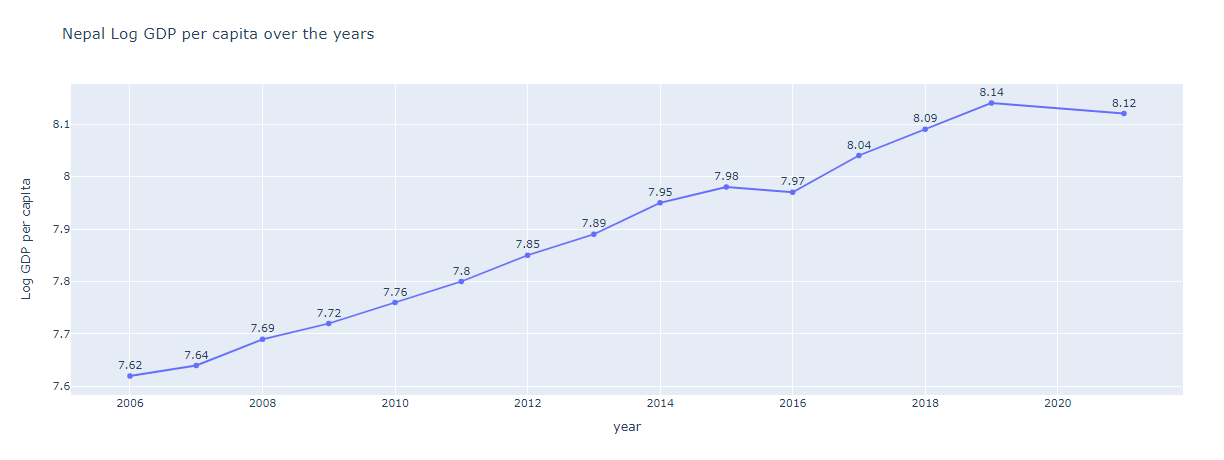

From above graph, we can conclude that Nepal GDP in increasing uniformly over the yeays

**Nepal ladder score over the years**

In [ ]:
fig=px.line(data_frame=nepal,x='year',y='Life Ladder',text='Life Ladder',title='Nepal ladder score over the years')
fig.update_traces(textposition='top center',texttemplate='%{text:.s}')
 
fig.show()

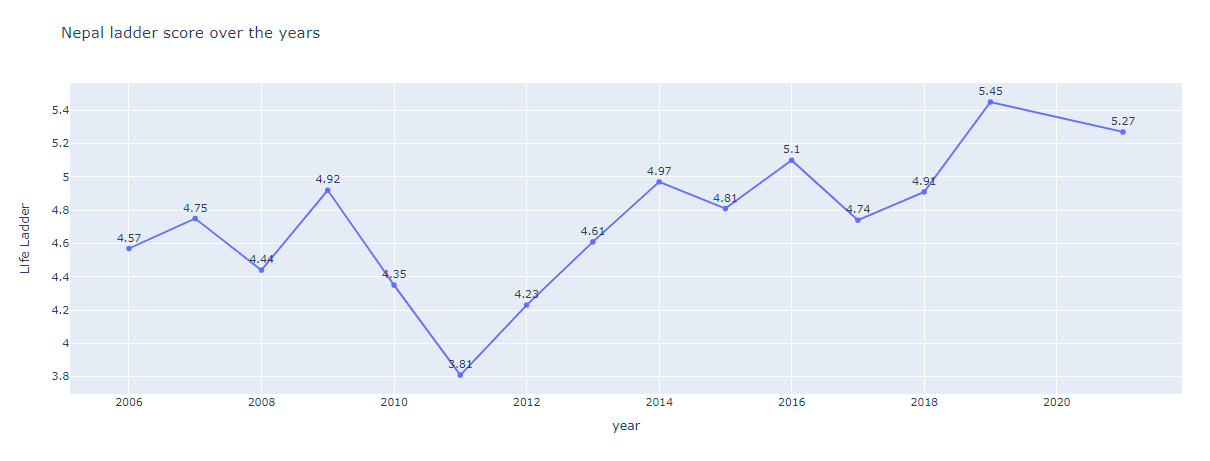

Nepal ladder score is unpredictable as some year it is increasing and some it is deacreasing.but in latest year, Nepal ladder score is more or less in range 5.2-5.5

**Nepal Perceptions of corruption score over the years**

In [ ]:

nepal['Perceptions of corruption']=nepal['Perceptions of corruption'].apply(lambda x:round(x,2))
fig=px.line(data_frame=nepal,x='year',y='Perceptions of corruption',text='Perceptions of corruption',title='Nepal Perceptions of corruption score over the years')
fig.update_traces(textposition='top center',texttemplate='%{text:.s}')
 
fig.show()

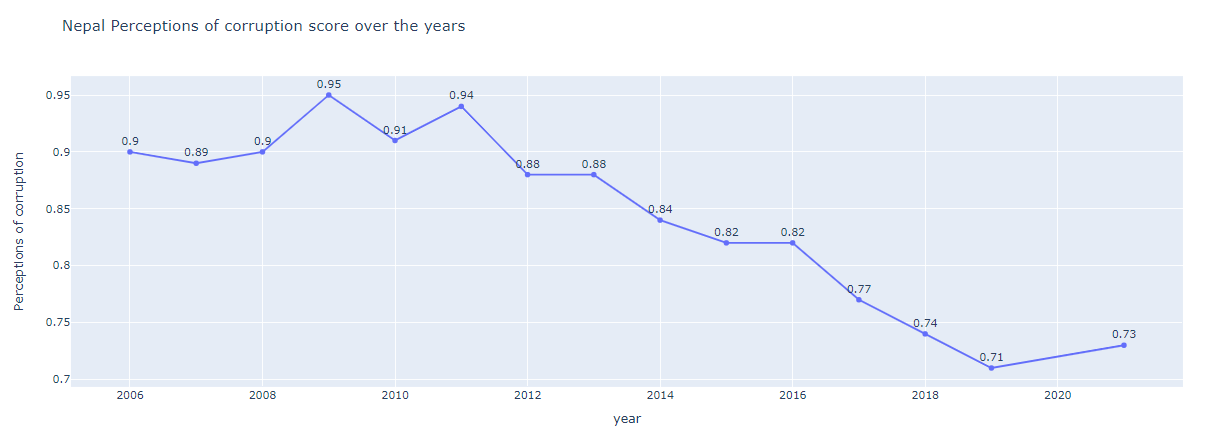

Nepal's Perceptions of corruption score over the years in decreasing uniformly over the years

**Nepal Freedom to make life choices score over the years**

In [ ]:
nepal['Freedom to make life choices']=nepal['Freedom to make life choices'].apply(lambda x:round(x,2))
fig=px.line(data_frame=nepal,x='year',y='Freedom to make life choices',text='Freedom to make life choices',title='Nepal Freedom to make life choices score over the years')
fig.update_traces(textposition='top center',texttemplate='%{text:.s}')
 
fig.show()

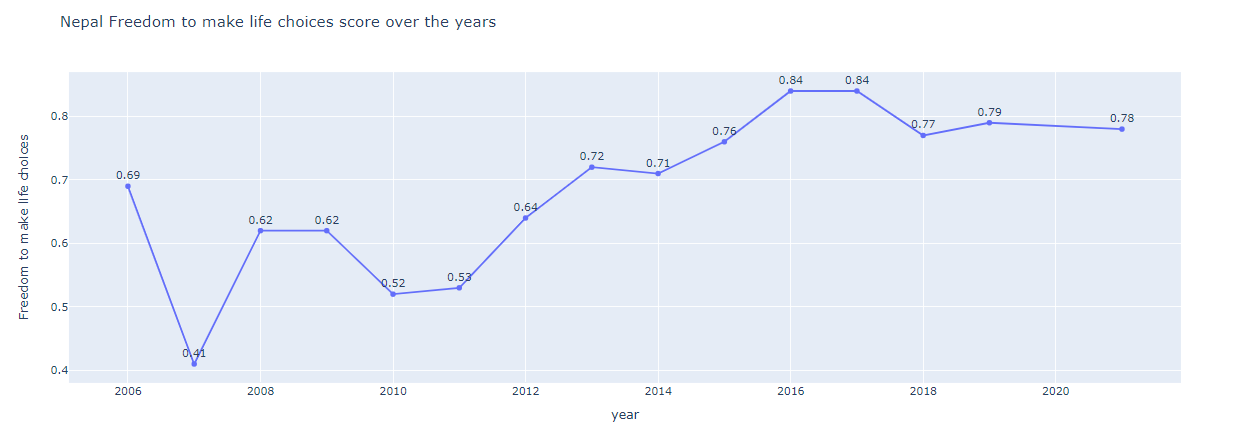

Nepal Freedom to make life choices score over the years is increasing uniformly overs the years

In [ ]:
#happiness index
final=pd.concat([df.loc[0:1],df_south])
final

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,3.253
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179,2.868
59,Maldives,South Asia,5.198,9.826,0.913,70.600,0.854,0.024,0.825,1.520
78,Sri Lanka,South Asia,4.325,9.470,0.827,67.299,0.841,0.079,0.863,1.075
105,India,South Asia,3.819,8.755,0.603,60.633,0.893,0.089,0.774,1.405
115,Pakistan,South Asia,4.934,8.458,0.651,58.709,0.726,0.098,0.787,2.784
116,Bangladesh,South Asia,5.025,8.454,0.693,64.800,0.877,-0.041,0.682,2.427
121,Nepal,South Asia,5.269,8.120,0.774,64.233,0.782,0.152,0.727,2.642
132,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924,1.895


**World Happinees index**

In [ ]:
px.bar(data_frame=final,x='Country name',text=final.index+1,y='Ladder score',title='rank according to happiness index ')

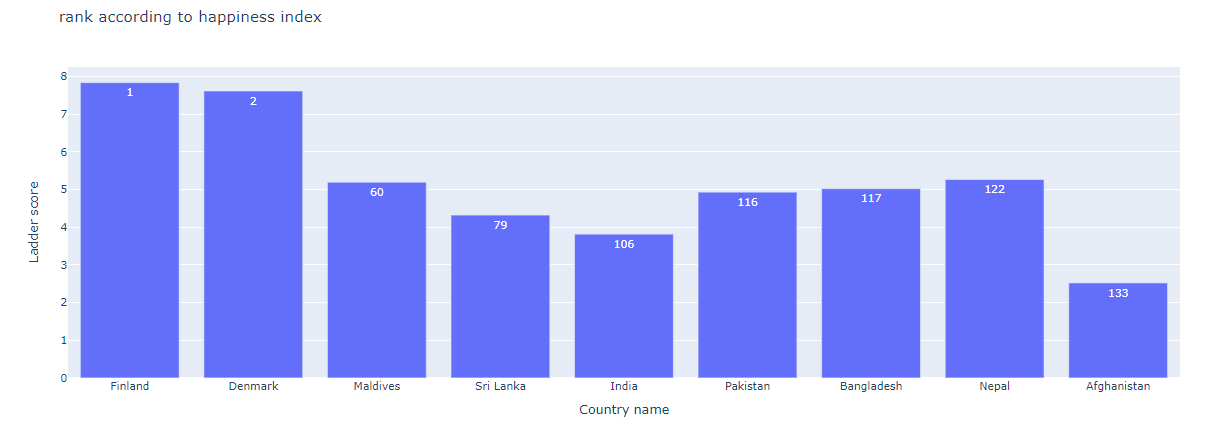

According to world happness index,Finland is rank first and nepal is rank 122.In South Asia region Maldives is in highest rank.

**rank according to log GDP**

In [ ]:
df=df.sort_values(by='Logged GDP per capita',ascending=False,ignore_index=True)
df_south=df[df['Regional indicator']=='South Asia']
final=pd.concat([df.loc[0:1],df_south])
px.bar(data_frame=final,x='Country name',y='Logged GDP per capita',text=final.index+1,title='rank according to log GDP')

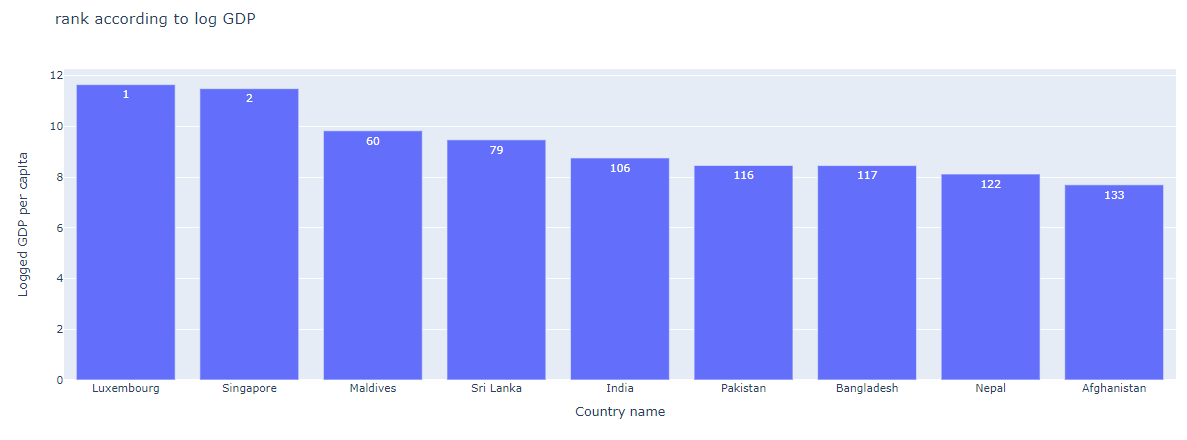

So, according to country GDP, Luxerbour and Singapour are in top position.Nepal position in 122 in world.Again,In South Asia Maldives have highest GDP .

**rank according to Perceptions of corruption**

In [ ]:

df=df.sort_values(by='Perceptions of corruption',ascending=False,ignore_index=True)
df_south=df[df['Regional indicator']=='South Asia']
final=pd.concat([df.loc[0:1],df_south])
px.bar(data_frame=final,x='Country name',y='Perceptions of corruption',text=final.index+1,title='rank according to Perceptions of corruption')

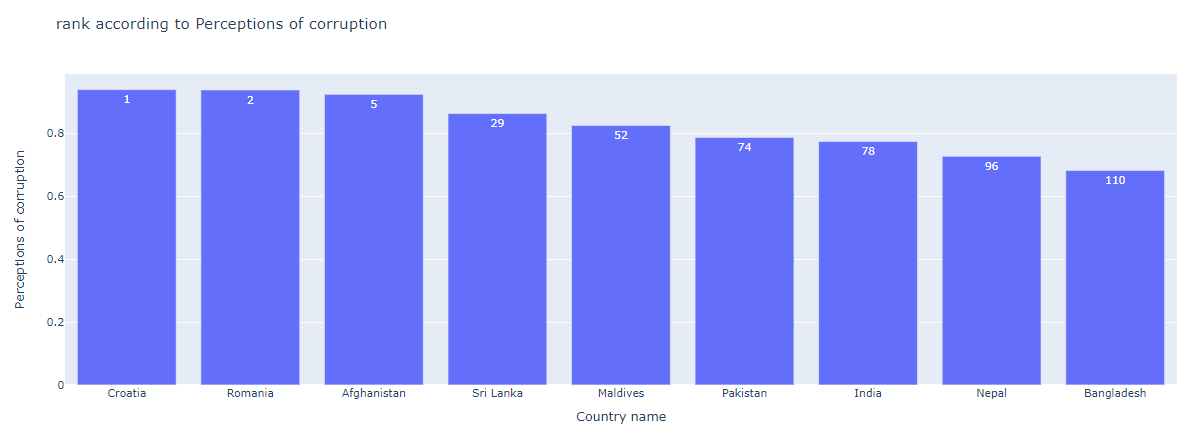

From the point of view of corruption,Crotia is the most corrupted country and in south asian Afghanistan is the most corrupted country.Nepal is in position 96.Srilanka is least corrputed country among south asian countries.


**rank according  to social support**

In [ ]:
df=df.sort_values(by='Social support',ascending=False,ignore_index=True)
df_south=df[df['Regional indicator']=='South Asia']
final=pd.concat([df.loc[0:1],df_south])
px.bar(data_frame=final,x='Country name',y='Social support',text=final.index+1,title=f'rank according  to social support')

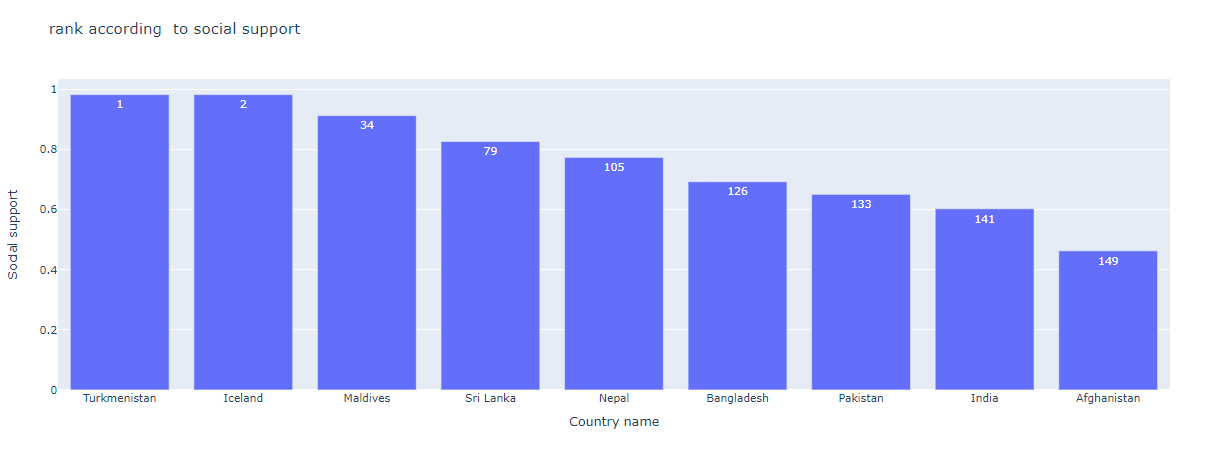

From the point of view of social support.Nepal rank is 105 and Turkmenistan is top country.In south asias Maldives is the top  country and afphanistan is lowest county in south asia